## 3- Modelos Geoc√™ntricos


## Distribui√ß√£o Normal

<img src="./images/Gauss.jpg" alt="gauss" />


fonte: [wikipedia](https://pt.wikipedia.org/wiki/Marco_alem%C3%A3o)


fonte: [Distribui√ß√£o Gausiana](https://www.bis-ans-ende-der-welt.net/Deutschland-B.htm)

### Regress√£o Linear

S√£o simples *golems* estat√≠sticos.


- Modelo de m√©dia e vari√¢ncia normalmente (Gaussiano) distribu√≠do.


- M√©dia como uma combina√ß√£o aditiva dos pesos das var√°veis que a comp√µem.


- Vari√¢ncia √© constante.

### Gerando um processo de flutua√ß√£o normal

Atrav√©s da flutua√ß√£o normal *(sobe 1 ou desce 1)* iremos construir um processo que tenha como resultante natural o surgimento de um comportamento cuja distribui√ß√£o podemos descrever como a normal.  

In [1]:
# Necess√°rio para desbloquear o asyncio no Jupyter

# Fonte: https://pystan.readthedocs.io/en/latest/faq.html
# Fonte: https://github.com/microsoft/playwright-python/issues/178

# Docs Pystan: https://pystan.readthedocs.io/en/latest/index.html

# -------------
# Instalar nest_asyncio: pip install nest_asyncio - Est√°ra no requirements.txt
# Vers√µes 
# python==3.8.0
# numpy==1.21.1
# pystan==3.2.0
# nest_asyncio==1.5.1
# -------------

# Rodar esse comando antes de import a stan (pystan vers√£o 3.x)
import nest_asyncio
nest_asyncio.apply()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

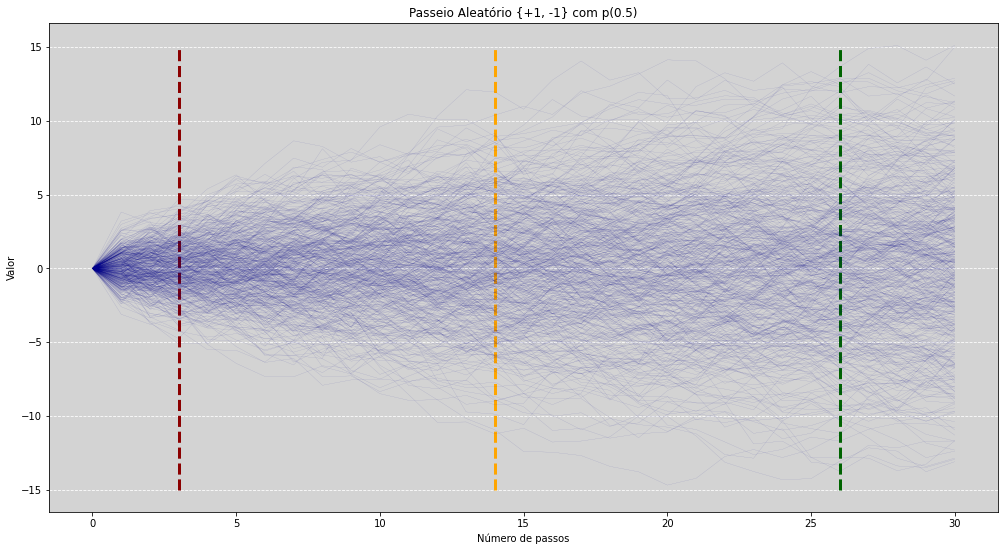

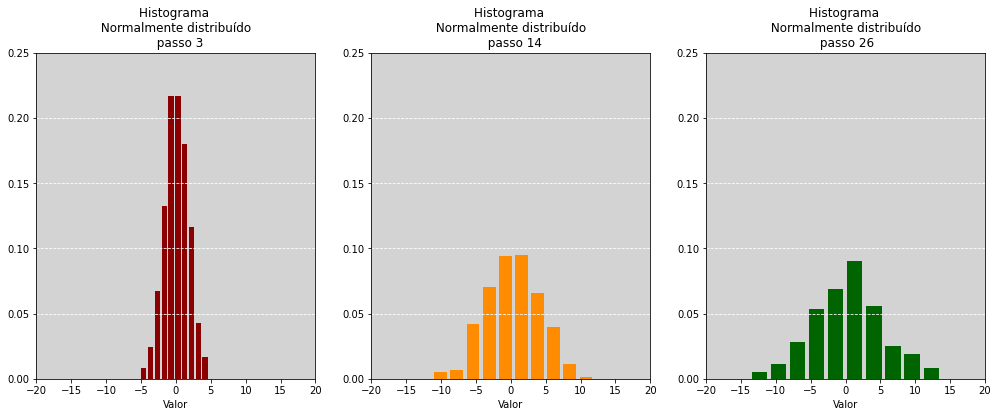

In [3]:
# Construindo um passeio conforme a distribui√ß√£o Bernoulli(0.5) em +1 ou -1

n_linhas = 500  # Quantas linhas iremos simular?
n_passos = 30   # Quantidade de passos que iremos simular?

corte_1 = 3   # Indica o primeiro corte no passeio
corte_2 = 14  # Indica o segundo corte no passeio
corte_3 = 26  # Indica o terceiro corte no passeio


aleatorizar_grafico = True  # True para ver a simula√ß√£o um pouco mais aleatorizada visualmente. False para ver sem efeito.

passeios = []  # Armazenar todos os passeios gerados num array

# Par√¢metros da simula√ß√£o
plt.figure(figsize=(17, 9))
plt.rcParams['axes.facecolor'] = 'lightgray'  # Alterando a cor de fundo, para ficar mais elegante. 

for linha in range(n_linhas):  # Quantas linhas iremos plotar
    
    passeio = [0]  # Inicializando todos os pontos com o valor 0 (conforme dito acima!)
    novo_ponto = 0  # vari√°vel de controle 
    
    for passo in range(n_passos):  # Quantos passos iremos simular?
        
        if aleatorizar_grafico:
            # +1 (subida) ou -1 (descida) - Com efeito de aleatorizac√£o (apenas para melhorar a visualiza√ß√£o).
            novo_ponto = novo_ponto + np.random.choice([1, -1]) * np.random.normal(0, 1) 
        else:    
            # +1 (subida) ou -1 (descida) - Sem efeito de aleatorizac√£o - "Pixelizado"
            novo_ponto = novo_ponto + np.random.choice([1, -1]) 
        
        passeio.append(novo_ponto)
    
    passeios.append(passeio)  # Armazendo todas as linhas geradas
    plt.plot(passeios[linha], color='darkblue', alpha=0.5, linewidth=0.1)  # Plotando a linha gerada
    
# Retas horizontais dos cortes
plt.vlines(corte_1, -15, 15, color='darkred', ls='--',  linewidth=3)
plt.vlines(corte_2, -15, 15, color='orange', ls='--', linewidth=3)
plt.vlines(corte_3, -15, 15, color='darkgreen', ls='--', linewidth=3)

# Configurando infos do gr√°fico    
plt.title("Passeio Aleat√≥rio {+1, -1} com p(0.5)")
plt.xlabel('N√∫mero de passos')
plt.ylabel('Valor')

plt.grid(axis='y', ls='--', color='white')

plt.show()

passeios = np.array(passeios).T  # Transpondo os vetores de passeios para ajuste na plotagem.

# ------------
# Gerando os histogramas de todas as linhas para alguns passos espec√≠ficos ao longo do passeio.
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 6))

ax1.hist(passeios[corte_1], color='darkred', rwidth=0.8, density=True)
ax1.grid(axis='y', ls='--', color='white')
ax1.set_title("Histograma \n Normalmente distribu√≠do \n  passo " + str(corte_1))
ax1.set_xlabel('Valor')
ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 0.25)

ax2.hist(passeios[corte_2], color='darkorange', rwidth=0.8, density=True)
ax2.grid(axis='y', ls='--', color='white')
ax2.set_title("Histograma \n Normalmente distribu√≠do \n  passo " + str(corte_2))
ax2.set_xlabel('Valor')
ax2.set_xlim(-20, 20)
ax2.set_ylim(0, 0.25)

ax3.hist(passeios[corte_3], color='darkgreen', rwidth=0.8, density=True)
ax3.grid(axis='y', ls='--', color='white')
ax3.set_title("Histograma \n Normalmente distribu√≠do \n passo " + str(corte_3))
ax3.set_xlabel('Valor')
ax3.set_xlim(-20, 20)      
ax3.set_ylim(0, 0.25)
    
plt.show()



Todas as flutua√ß√µes geradas se equilibriam entre si, gerando assim uma curva sim√©trica. Por√©m cada uma delas individualmente, e n√£o necessariamente, se equilibram entre si. Isso √© a $Normal$! 

### Porque a Normal?


O interessante, e frustrante ao mesmo tempo, √© que mesmos n√≥s sabendo como cada uma das curvas s√£o geradas, n√£o temos acesso a `como cada uma delas individualmente faz o seu percurso`, pois temos muito pouca informa√ß√£o sobre como √© o processo gerador dessas curvas.


Assim, quando vimos um comportamento de um evento que √© normalmente distribu√≠do, por exemplo, n√£o sabemos o que tem la dentro! N√£o temos um acesso intuitivo da informa√ß√£o contida no comportamento individual de cada passeio.


Mas sabendo que o processo como um todo tem o comportamento, aproximadamente, normalmente distribu√≠do, podemos usar essa informa√ß√£o para falsificar ou n√£o hip√≥teses de um estudo particular.


$$ x \sim normal(\mu, \sigma) $$



E isso √© muito legal, pois podemos descrever o processo como um todo, com apenas por dois n√∫meros, pois toda a informa√ß√£o do funcionamento da maquinaria subjacente do processo foi eliminada. E tudo que foi preservado foi a m√©dia ($\mu$) e o desvio padr√£o ($\sigma$), por isso que precisamos apenas desses dois n√∫meros para descrever uma distribui√ß√£o normal.


```{note}
Essa √© toda a informa√ß√£o que conseguimos extrair da maquinaria subjacente, a Natureza!
```


O mais terr√≠vel √© que n√£o podemos saber o funcionamento do processo a partir de um simples histograma! Temos que realmente fazer ci√™ncia para isso, temos de *cavar mais fundo*, *medir coisas mais dif√≠ceis* para `s√≥ assim` descobrir mais algumas coisas nas profundezas do mecanismo de gera√ß√£o do processo.


Isso √© verdade n√£o apenas para a $Normal$, mas para muitas outras distribui√ß√µes! Todas as distribui√ß√µes de m√°xima entropia tem essa mesma propriedade, que muitos processos diferentes possuem a mesma distribui√ß√£o de frequ√™ncias.


### Perspectiva Ontol√≥gica

Ontologia √© o ramo da filosofia que `estuda a natureza do ser`, da exist√™ncia e da pr√≥pria realidade. Vamos observar a distribui√ß√£o $Normal$ sobre uma perspectiva ontol√≥gia:


- Processo que adiciona flutua√ß√µes amortecidas como resultado.


- As flutua√ß√µes amortecidas se aproximam de uma gaussiana.


- Mas nenhuma informa√ß√£o sobrou do processo gerador, apenas a m√©dia e a vari√¢ncia.


- N√£o podemos inferir o processo a partir dessa distribui√ß√£o.


Se quisermos construir um modelo visando responder de modo mais conservador poss√≠vel, no qual tudo que estiver disposto a dizer sobre algum conjunto de medidas, como medida de alturas, √© que eles t√™m vari√¢ncia finita e podemos usar a distribui√ß√£o gaussiana. 

Mesmo se eles forem distorcidos ou alguma outras coisas, a distribui√ß√£o gaussiana cobrir√° uma faixa mais ampla de valores do que qualquer outra com a mesma m√©dia e a mesma vari√¢ncia! 

Essa √© a distribui√ß√£o mais √© conservadora que podemos assumir. Qualquer outra distribui√ß√£o ser√° mais restrita por isso ter√° mais informa√ß√£o incorporada, por isso a op√ß√£o mais conservadora que podemos propor √© a `gaussiana`, no qual tudo que precisamos para ela √© a m√©dia a vari√¢ncia. (*Isso ser√° demostrado mais para frente no curso*.)


### Perspectiva Epistemologica

Epistemologia, tamb√©m conhecida como a Teoria do Conhecimento, √© o ramo da filosofia que estuda como o ser humano ou a pr√≥pria ci√™ncia adquire e justifica seus conhecimentos. Vamos observar a $Normal$ sobre essa perspectiva:


- Conhecemos apenas a m√©dia e a vari√¢ncia.


- A menos surpreendente e mais conservadora (*m√°xima entropia*) distribui√ß√£o gaussiana.


- √â a distribui√ß√£o natural da m√°xima entropia.


### Modelos Lineares

"**Modelo lineares generalizados**": teste *t*, regress√£o simples, regress√£o multipla, ANOVA, ANCOVA, MANOVA, MANCOVA, etc, etc, etc. Todos esses modelos `s√£o a mesma coisa, s√£o todos modelos os lineares`.

A seguir, iremos construir modelos lineares manualmente e do zero para entendermos como √© o processo de pensamento de constru√ß√£o de hip√≥teses e, tamb√©m, iremos construir um gr√°fico no qual iremos visualizar a nossa incerteza do sistema.

```{warning}
Iremos aprender estrat√©gias e n√£o procedimentos!
```

#### Acordando a linguagem que iremos trabalhar

Relembrando o primeiro modelo que n√≥s fizemos anteriormente, o lan√ßamento do globo, n√≥s tinhamos:

$$ w \sim Binomial(N, p) $$

$$ p \sim Uniform(0, 1) $$



- $w$: Resultado



- $\sim$: "*√â distribu√≠do como...*" 



- $Binomial( N, p)$: √â a fun√ß√£o de distribui√ß√£o de probabilidade dos dados (verossimilhan√ßa, ou *likelihood* no ingl√™s)



- $p$: √â o par√¢metro que iremos estimar



- $Uniform(0, 1)$: Nossa distribui√ß√£o *√† priori*




 No exemplo do lan√ßamento do globo, o que est√°vamos interessados em saber era a propor√ß√£o de √°gua na superf√≠cie ($p$) da Terra. O processo que usamos para coletar os dados, a amostragem, automaticamente nos prop√µem, de modo quase impositivo, a utiliza√ß√£o da estrutura Binomial.
 
A estrutura que distribui os dados binominalmente, nada mais √© do que a contagem do n√∫mero de vezes que √© poss√≠vel acontecer tal fato, dado que a propor√ß√£o $p$ √© fixa para todas √†s vezes $N$ que iremos retirar uma amostra. 

----

Essa √© a linguagem que iremos usar nesse curso. A nota√ß√£o matem√°tica padr√£o, na qual consiste em uma maneira de comunicar a todos os nossos colegas de trabalho o que foi pensado, quais foram as suposi√ß√µes, quais foram as hip√≥teses (isto √©, as sugest√µes) e, tamb√©m, qual a estrutura foi proposta para um poss√≠vel caminho para se entender o problema. 

```{note}
A linguagem matem√°tica ser√° a forma de comunicar ao mundo sua forma de pensar!
```

### Linguagem da modelagem

Do mesmo modo que escrevemos o modelo acima iremos escrever todos os outros modelos, inclusive, a programa√ß√£o usando a linguagem probabil√≠stica `Stan`, o qual tem a sua sintaxe pr√≥xima a esse formato.

Para qualquer modelo que iremos elaborar, seja uma regress√£o linear simples ou modelos mais elaborados, temos que criar uma lista com todas as vari√°veis que ir√£o participar desse modelo. Algumas `coisas que iremos observar nos dados`, como a contagem do n√∫mero de vezes que o globo foi lan√ßado. E tamb√©m haver√° outras `coisas que n√£o vamos poder observar`, como a inclina√ß√£o de uma reta de uma modelo linear simples, ou propor√ß√£o de √°gua no globo, pois elas n√£o s√£o entidades observ√°veis.

Por isso temos que listar todas as vari√°veis e ent√£o defini-las.


Listando as vari√°veis:

$$ y_i $$

$$ \mu_i $$

$$ \beta $$

$$ \sigma $$

$$ x_i $$


Um modelo de regress√£o, assim como qualquer outro modelo, ser√° escrito da mesma forma que vimos anteriormente, por√©m esse modelo ter√° muito mais s√≠mbolos pois temos muito mais vari√°veis participando da explica√ß√£o, `mas √© a mesma coisa`, apenas precisamos definir a cada um desses s√≠mbolos. 

O motor dos modelos de regress√£o linear √© a segunda linha da defini√ß√£o abaixo (*a seguir iremos construir esse modelo desde o in√≠cio*):

$$ y_i \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = \beta x_i $$

$$ \beta \sim Normal(0, 10) $$

$$ \sigma \sim Exponencial(1) $$

$$ x_i \sim Normal(0, 1) $$
 
 
Essa segunda linha,  $ \mu_i = \beta x_i $, geralmente a parte que √© mais confusa para se entender (iremos ver um exemplo a seguir), mas ela significa que m√©dia da distribui√ß√£o normal de cima (m√©dia do $y_i$) √© geralmente definida por uma equa√ß√£o, o que define em termos de alguma outra vari√°vel que observamos, $x_i$.

O $x_i$ √© uma vari√°vel que ajuda a explicar o comportamento do $y_i$, ou seja, $x_i$ √© uma vari√°vel explicativa.

Mas repare que $x_i$ tamb√©m tem uma distribui√ß√£o, n√≥s normalmente n√£o nos preocupamos em definir uma distribui√ß√£o para as vari√°veis explicativas, pois n√£o iremos prev√™-las, `por√©m existe uma grande vantagem em fazer essas suposi√ß√µes de distribui√ß√£o`, pois podemos fazer coisas muito legais com esse fato, iremos ver essas coisas mais √† frente, tais como `medidas de erros` e tamb√©m `dados faltantes`.

Assim, como todas as vari√°veis t√™m sua pr√≥pria defini√ß√£o de distribui√ß√£o, se voc√™ n√£o sabe algo sobre algumas delas podemos colocar dentro do modelo e assim iremos ganhar automaticamente um poder inferencial do que est√°vamos perdendo antes.  

# Constru√≠ndo um Modelo Linear

Com o conjunto de dados amostrados de uma popula√ß√£o, extra√≠da do livro da *Nancy Howel*, `Life history of the DOBE !KUNG`, um novo cl√°ssico de demografia evolucion√°ria, dispon√≠vel no pacote R *rethinking* e suas vers√µes variantes. (Nesse material temos uma c√≥pia do link [Rethinking - R-library - GitHub](https://github.com/rmcelreath/rethinking).

<img src="./images/dobe_kung.jpg" alt="Dobe !Kung">

## Estudo Descritivo da Base de Dados

In [4]:
df = pd.read_csv('data/Howell1.csv', sep=';')  # Banco de dados do pacote Rethinking - Dispon√≠vel no Github
df.describe()  # Resumo do banco de dados

height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

Nosso conjunto de dados cont√©m um total de $544$ indiv√≠duos, abaixo temos um histograma descritivo das quatro vari√°veis da base: 


- Altura (*height*)


- Peso (*weight*)


- Idade (*Age*)


- G√™nero (*male*) - Definido $1$ para homens e $0$ para mulheres

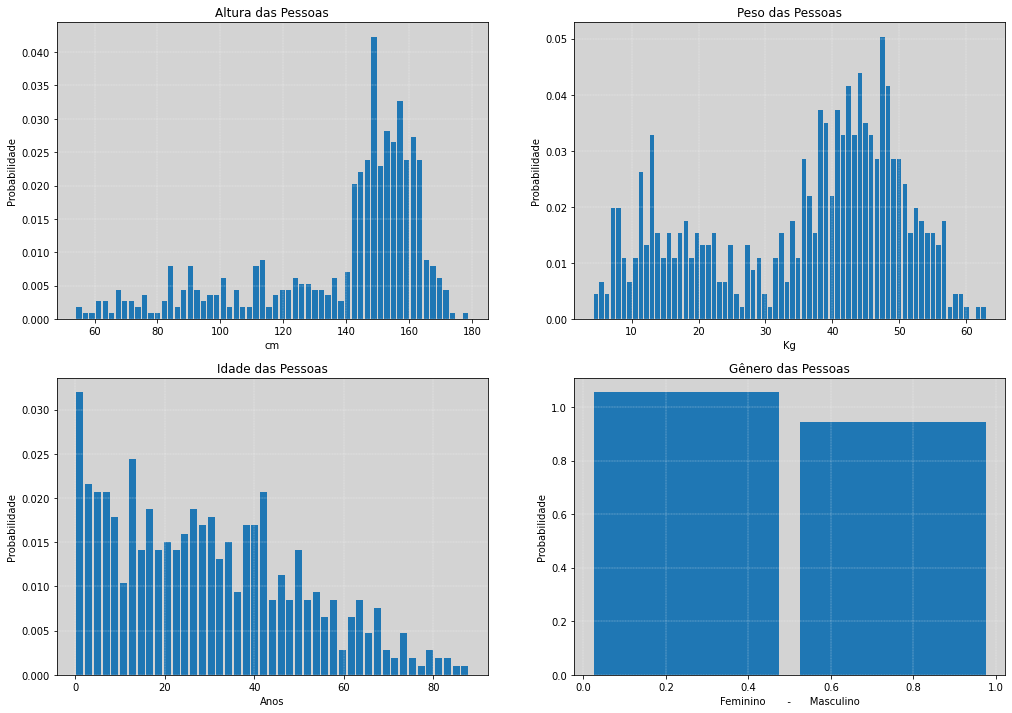

In [5]:
# Plotando os histogramas
plt.rcParams['axes.facecolor'] = 'lightgray'
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(17, 12))

# Histograma de todos os dados da altura (height)
ax1.hist(df.height, bins=60, density=True, rwidth=0.8)
ax1.set_title('Altura das Pessoas')
ax1.set_xlabel('cm')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', linewidth='0.3', ls='--')

# Histograma de todos os dados do peso (weight)
ax2.hist(df.weight, bins=70, density=True, rwidth=0.8)
ax2.set_title('Peso das Pessoas')
ax2.set_xlabel('Kg')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', linewidth='0.3', ls='--')

# Histograma de todos os dados da idade (age)
ax3.hist(df.age, bins=45, density=True, rwidth=0.8)
ax3.set_title('Idade das Pessoas')
ax3.set_xlabel('Anos')
ax3.set_ylabel('Probabilidade')
ax3.grid(color='white', linewidth='0.3', ls='--')

# Histograma de todos os dados da g√™nero (male)
ax4.hist(df.male, bins=2, density=True,rwidth=0.9)
ax4.set_title('G√™nero das Pessoas')
ax4.set_xlabel('Feminino       -      Masculino')
ax4.set_ylabel('Probabilidade')
ax4.grid(color='white', linewidth='0.3', ls='--')

plt.show()

## Modelos Gaussianos

Vamos propor um primeiro modelo, abaixo temos a um modelo $Normal$: 

$$ h_i \sim Normal(\mu, \sigma) $$

A altura $h$ do indiv√≠duo $i$ ser√° distribu√≠do normalmente, com uma m√©dia $\mu$ e o desvio padr√£o $\sigma$.

-----

Estamos usando as letras gregas $\mu$ e $\sigma$, por conven√ß√£o de linguagem, mas nada nos impede de usarmos quaisquer outros s√≠mbolos. N√£o haver√° nenhum problema, `apenas iremos irritar alguns estat√≠sticos`, mas isso ser√° mais um *b√¥nus*!

Aqui √© necess√°rio que voc√™ saiba ler e entender o que isso significa, s√≥ assim voc√™ aprender√° o que est√° acontecendo. Lembre-se isso √© `apenas uma linguagem`, isso n√£o √© um c√≥digo. √â apenas uma forma de comunica√ß√£o, ou seja, √© uma comunica√ß√£o cient√≠fica.

-----

Aqui temos duas vari√°veis para estimar, $\mu$ e $\sigma$, e teremos que inferir a partir de $h$, das coisas que medimos, mas $\mu$ e $\sigma$ precisam de defini√ß√µes por que esse √© um modelo bayesiano.

## Adicionando prioris

Agora vamos definir uma priori para os par√¢metros da $Normal$, o $\mu$ e o $\sigma$:

$$ h_i \sim Normal(\mu, \sigma) $$

$$ \mu \sim Normal(178, 20) $$

$$ \sigma \sim Uniform(0, 50) $$

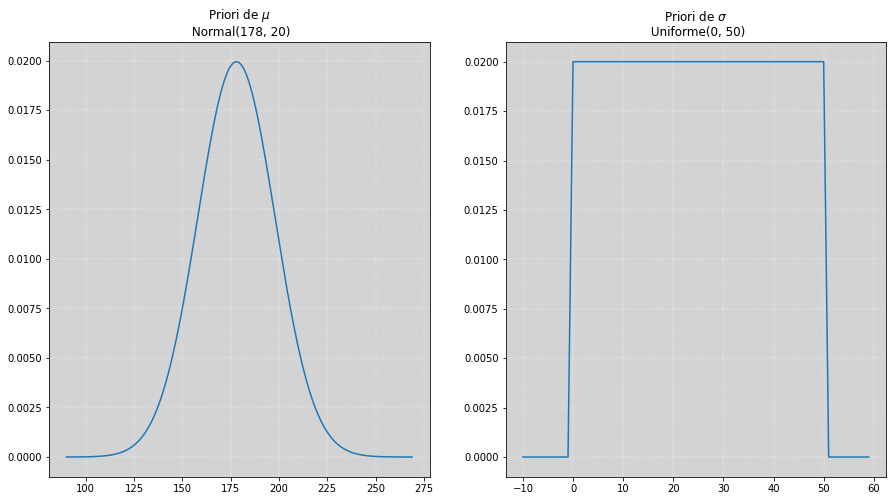

In [6]:
# Plotando a distribui√ß√£o √† priori do mu e do sigma

plt.rcParams['axes.facecolor'] = 'lightgray'

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 8))

x_mu = np.arange(90, 270, 1)
x_sigma = np.arange(-10, 60)

# Priori do mu
ax1.plot(x_mu, stats.norm(178, 20).pdf(x_mu))
ax1.set_title('Priori de $\mu$ \n Normal(178, 20)')
ax1.grid(color='white', linewidth='0.3', ls='--')

#Priori do Sigma
ax2.plot(x_sigma, stats.uniform(0, 50).pdf(x_sigma))
ax2.set_title('Priori de $\sigma$ \n Uniforme(0, 50)')
ax2.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Qual √© a implica√ß√£o de usar essas distribui√ß√µes para $\mu$ e $\sigma$? 

O valor $178$ foi escolhido para ser a m√©dia da distribui√ß√£o normal (*√† priori*), esse valor foi escolhido por `acharmos` que poderia ser a altura m√©dia da popula√ß√£o, e com isso adicionamos uma generosa incerteza (*incerteza da m√©dia*) de $20$ (gr√°fico da esquerda).

Para o $\sigma$ colocamos qualquer valor entre $0$ at√© $50$ (gr√°fico da direita), esses valores t√™m igual probabilidade de ocorrer, esse √© um range bastante razo√°vel j√° que $50$ √© um valor bem mais alto do que podemos esperar para o desvio padr√£o, pois n√£o temos uma nenhuma informa√ß√£o mais razo√°vel para colocar como priori (no mundo real certamente saber√≠amos um pouco mais).

## Simula√ß√£o a partir da priori

O que essas `prioris` est√£o implicando sobre a estimativa da altura, antes de vermos os dados ($h$)? 

Para saber, vamos Simular! `Distribui√ß√£o √† Priori Preditiva`.

Simular os dados apenas das prioris nos permitir√° entender se, do modo como estamos *ensinando* o modelo, seu resultado est√° sendo satisfat√≥rio. 

Vamos simular!


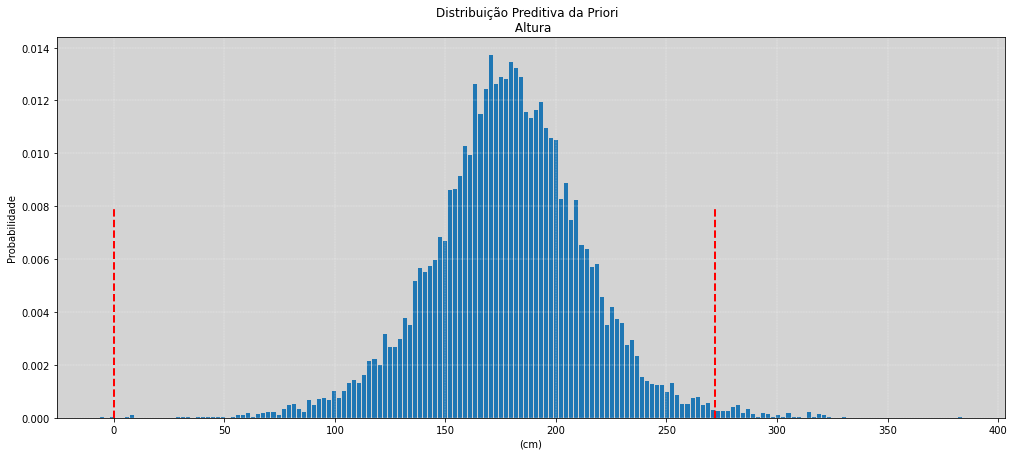

In [7]:
# ========================================================================
# Construindo o processo de amostragem da distribui√ß√£o √† priori preditiva.
# ========================================================================

# Amostragem
amostra_mu = stats.norm(178, 20).rvs(10000)  # Amostra da Normal(178, 20) estimativa para mu.
amostra_sigma = stats.uniform(0, 50).rvs(10000)  # Amostra da Uniforme(0, 50) estimativa para sigma.

amostra_h_priori = stats.norm(amostra_mu, amostra_sigma).rvs()  # Amostrando da Normal(mu, sigma)


# Plot
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.figure(figsize=(17, 7))

plt.hist(amostra_h_priori, bins=171, rwidth=0.8, density=True)
plt.title('Distribui√ß√£o Preditiva da Priori  \n Altura')
plt.xlabel('(cm)')
plt.ylabel('Probabilidade')

plt.vlines(0, 0, 0.008, color='red', ls='--', linewidth=2)  # 0 cm de altura, ovo fertilizado.
plt.vlines(272, 0, 0.008, color='red', ls='--', linewidth=2)  # 272 cm de altura, pessoa mais alta da hist√≥ria.

plt.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Plotar o gr√°fico da `Distribui√ß√£o Preditiva da Priori` nos permite observar que a probabilidade, por exemplo, de algu√©m ter a altura pr√≥xima de $0 cm$ √© praticamente igual a *zero*, $P\{altura = 0\}$, e ,tamb√©m, a probabilidade de uma pessoa ser maior do que $272 cm$, $P\{altura >= 272\}$, que √© a `altura da pessoa mais alta no mundo j√° registrada`, √© bem baixa.

Imagine agora que colocaremos como √† priori valores muito absurdos para o $\sigma$, vamos ver o que acontece:

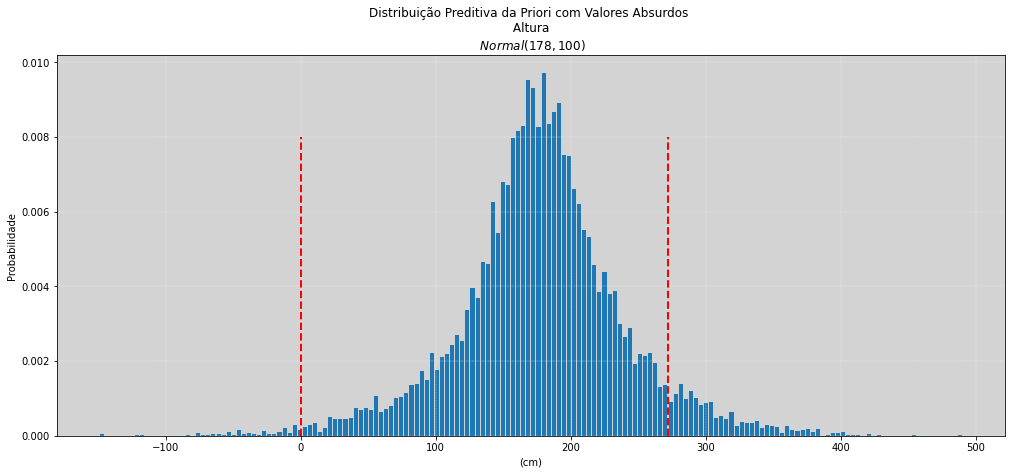

In [8]:
# ========================================================================
# Construindo o processo de amostragem da distribui√ß√£o √† priori preditiva.
#                *** Priori vers√£o com dados absurdos  ***
# ========================================================================

# Amostragem
amostra_mu = stats.norm(178, 20).rvs(10000)  # Amostra da Normal(178, 20) estimativa para mu.
amostra_sigma = stats.uniform(0, 100).rvs(10000)  # Amostra da Uniforme(0, 50) estimativa para sigma.

amostra_h_priori = stats.norm(amostra_mu, amostra_sigma).rvs()  # Amostrando da Normal(mu, sigma)


# Plot
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.figure(figsize=(17, 7))

plt.hist(amostra_h_priori, density=True, bins=170, rwidth=0.8)
plt.title('Distribui√ß√£o Preditiva da Priori com Valores Absurdos \n Altura \n $Normal(178, 100)$')
plt.xlabel('(cm)')
plt.ylabel('Probabilidade')

plt.vlines(0, 0, 0.008, color='red', ls='--', linewidth=2)  # 0 cm de altura, ovo fertilizado.
plt.vlines(272, 0, 0.008, color='red', ls='--', linewidth=2)  # 272 cm de altura, pessoa mais alta da hist√≥ria. 

plt.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Os valores de probabilidade que est√£o sendo atribu√≠do pela distribui√ß√£o √† priori e que `est√£o para fora dos limites mais conservadores poss√≠veis`, n√£o deveriam ter uma import√¢ncia t√£o grande, ou seja, sua probabilidade deveria `se aproximar` de *zero*!

Esse √© um exemplo de escolha ruim para uma priori, colocando apenas um valor enorme para $\sigma$ mas sem ter uma liga√ß√£o mais √≠ntima com a natureza do problema. 

Nesse caso, `o caso univariado`, as distor√ß√µes que podem ser geradas por usarmos uma priori dessa forma √© praticamente nula, o modelo provavelmente ajustar√° bem. J√° para modelos mais complexos, como modelos mistos ou modelos hier√°rquicos com muitos par√¢metros, a utiliza√ß√£o de prioris sem muito sentido podem causar *s√©rias* distor√ß√µes nos resultados. 

Por isso, `sempre simule a priori` para observar se o comportamento do modelo condiz com a realidade mais plaus√≠vel. 

```{note}
Priori: √© essa a nossa cren√ßa antes do modelo ver o dados!
```

## Calculando a Posteriori Conjunta

Nosso objetivo √© estimar a distribui√ß√£o conjunta dos par√¢metros $\mu$ e $\sigma$, para isto, iremos calcular a estimativa pelo m√©todo do *grid de aproxima√ß√£o*.

$$ p\{(\mu, \sigma) | h_i\} ‚àù p\{h_i | \mu, \sigma \} p\{ \mu \} p\{ \sigma \} $$

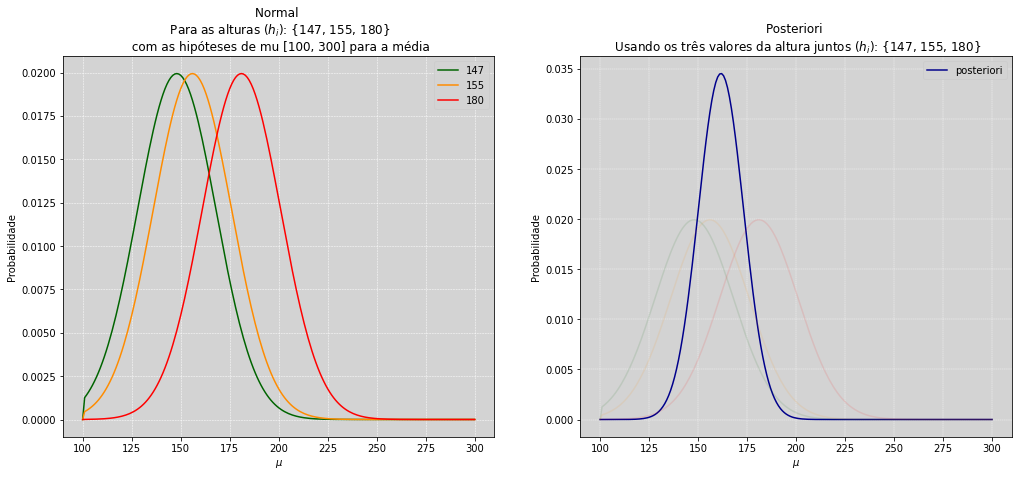

In [9]:
# Para visualiza√ß√£o das multiplica√ß√µes vamos deixar o ùúé fixo, em 20, por exemplo, 
# e iremos variar o ùúá entre 100 e 300, para os tr√™s valores distintos de alturas (147, 155, 180).

curva_1 = 0  # Resetando a vari√°vel curva_1 
curva_2 = 0  # Resetando a vari√°vel curva_2
curva_3 = 0  # Resetando a vari√°vel curva_3

posteriori = np.array([])

for mu in np.arange(100, 300, 1):
    curva_1 = np.append(curva_1, stats.norm(mu, 20).pdf(147))  # Para todos os ùúá, calcular a probabilidade de ocorrer 147 com sigma fixo.
    curva_2 = np.append(curva_2, stats.norm(mu, 20).pdf(155))  # Para todos os ùúá, calcular a probabilidade de ocorrer 155 com sigma fixo.
    curva_3 = np.append(curva_3, stats.norm(mu, 20).pdf(180))  # Para todos os ùúá, calcular a probabilidade de ocorrer 180 com sigma fixo.
    
# Plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 7))
ax1.plot(np.arange(100, 301), curva_1, color='darkgreen')
ax1.plot(np.arange(100, 301), curva_2, color='darkorange')
ax1.plot(np.arange(100, 301), curva_3, color='red')

ax1.set_title('Normal \n Para as alturas ($h_i$): {147, 155, 180} \n com as hip√≥teses de mu [100, 300] para a m√©dia')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', linewidth='0.5', ls='--')

ax1.legend(['147', '155', '180'])

posteriori_nao_normalizada = curva_1 * curva_2 * curva_3   # Essa multiplica√ß√£o ser√° feita ponto a ponto.

posteriori = posteriori_nao_normalizada / np.sum(posteriori_nao_normalizada)  # Normalizando a posteriori
ax2.plot(np.arange(100, 301), posteriori, color='darkblue')  # Essa multiplica√ß√£o ser√° feita ponto a ponto.
ax2.plot(np.arange(100, 301), curva_1, color='darkgreen', alpha=0.1)
ax2.plot(np.arange(100, 301), curva_2, color='darkorange', alpha=0.1)
ax2.plot(np.arange(100, 301), curva_3, color='red', alpha=0.1)

ax2.set_title('Posteriori \n Usando os tr√™s valores da altura juntos ($h_i$): {147, 155, 180}')
ax2.set_xlabel('$\mu$')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', linewidth='0.4', ls='--')
ax2.legend(['posteriori'])

plt.show()

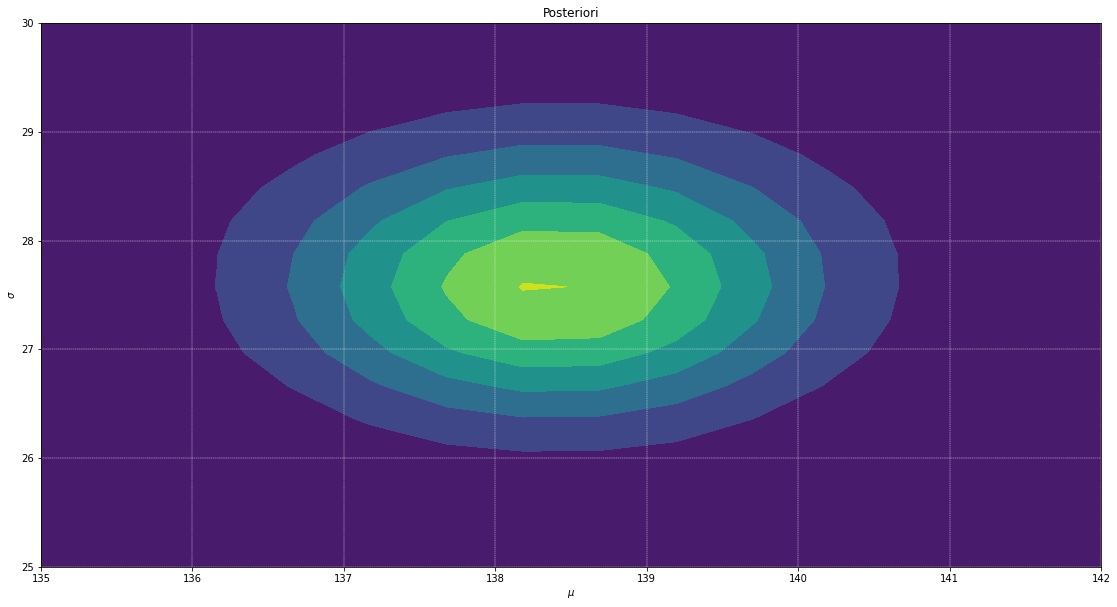

In [10]:
# ================================
#     Calculando a posteriori
# ================================

grid = 100  # Determina a precis√£o, para valores maiores demanda maior custo computacional!

mu_ls = np.linspace(120, 170, grid)  # Espa√ßo do mu - Esses valores foram escolhidos para uma melhor visualiza√ß√£o.
sigma_ls = np.linspace(10, 40, grid)  # Espa√ßo do sigma - Esses valores foram escolhidos para uma melhor visualiza√ß√£o.

mu, sigma = np.meshgrid(mu_ls, sigma_ls)  # Construindo um plano do ùúá vs ùúé.

mu = mu.flatten()
sigma = sigma.flatten()

verossimilhanca = np.array([])

for i in range(grid**2):
    verossimilhanca_parcial = stats.norm(mu[i], sigma[i]).pdf(df.height) # Calcular a probabilidade para todos os ùúá e ùúé, todas as alturas da amostra. 
    verossimilhanca_parcial_log = np.log(verossimilhanca_parcial.flatten())  # Calculando o log da verssimilhan√ßa
    verossimilhanca = np.append(verossimilhanca, np.sum(verossimilhanca_parcial_log))

# Adicionando a priori
# P{ altura | ùúá, ùúé} * P{ùúá} * P{ùúé}  ==  exp[ log(P{ altura | ùúá, ùúé}) + log(P{ùúá}) + log(P{ùúé}) ]

posteriori_nao_normalizada = verossimilhanca + \
                             np.log(stats.norm(178, 20).pdf(mu.flatten())) + \
                             np.log(stats.uniform(0, 50).pdf(sigma.flatten()))   # Priori de sigma
    
posteriori = np.exp(posteriori_nao_normalizada - max(posteriori_nao_normalizada))  # Por que isso? Est√° no livro, pg.85 - R code 4.16 
posteriori = posteriori / posteriori.sum()

plt.figure(figsize=(19, 10))
mu_mesh, sigma_mesh = np.meshgrid(mu_ls, sigma_ls, sparse=True)

plt.contourf(mu_mesh.flatten(), sigma_mesh.flatten(), posteriori.reshape((grid, grid)))

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Posteriori')

plt.xlim(135, 142)
plt.ylim(25, 30)

plt.grid(ls='--', color='white', linewidth=0.4)
plt.show()

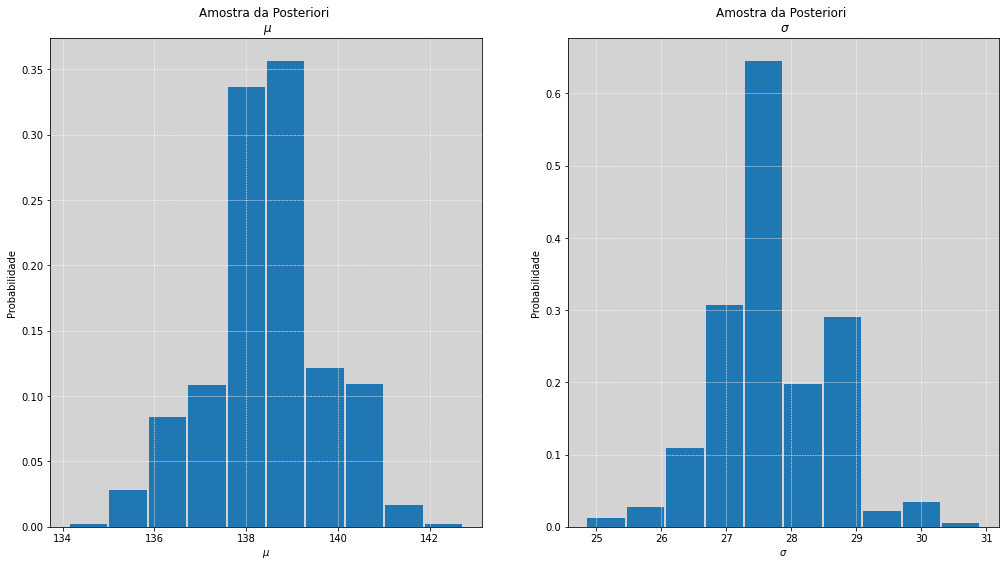

In [11]:
# =================================================================
#     Amostrando ùúá e o ùúé a partir da distribui√ß√£o √† posteriori.
# =================================================================

# Escolhendo pontos 1000 pontos aleat√≥rios dentro do grid com a probabilidade √† posteriori
amostras_posteriori_index = np.random.choice(np.arange(grid*grid), size=1000, replace=True, p=posteriori)

mu_amostrado = mu[amostras_posteriori_index]
sigma_amostrado = sigma[amostras_posteriori_index]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

ax1.hist(mu_amostrado, bins=10, rwidth=0.95, density=True)
ax1.set_title('Amostra da Posteriori \n $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', ls='--', linewidth=0.5)

ax2.hist(sigma_amostrado, bins=10, rwidth=0.95, density=True)
ax2.set_title('Amostra da Posteriori \n $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', ls='--', linewidth=0.5)

plt.show()

## Aproxima√ß√£o Quadr√°tica 

A partir de agora at√© a metade do curso iremos usar a `aproxima√ß√£o quadr√°tica`. Se voc√™ fez os c√°lculos da posteriori para a altura, oque √© sugerido fortemente, percebemos que a complexidade e o custo computacional envolvido para estimar √†s duas vari√°veis ($\mu$ e $\sigma$) s√£o bastante significativos.

Para modelos que necessitem estimar mais par√¢metros, $10$ par√¢metros por exemplo, o custo computacional e a estrutura necess√°ria para calcular essa estimativa com o m√©todo do *grid de aproxima√ß√£o* se torna invi√°vel. Por isso temos que pensar em uma nova estrutura na qual podemos, **Laplace**, $1749-1827$, propor o uso da aproxima√ß√£o quadr√°tica. Com essa estrutura mais ex√≥tica, n√≥s poderemos calcular estimativas da posteriori em dimens√µes muito elevadas.


- Aproxima√ß√£o da posteriori como uma Gaussiana


- Podemos construir essa estimativa encontrando o valor das duas seguintes coisas:
    
    
    - Pelo "pico" da posteriori, maximum a posteriori (MAP)

    - Desvio Padr√£o e a correla√ß√£o entre os par√¢metros.
    
    
- As estimativas s√£o bem parecidas com o que j√° fizemos, exceto que n√£o temos prioris.
 
 
A primeira coisa que temos que olhar √© para a posteriori (*nos histogramas acima*) de $\mu$ e $\sigma$ e subir a colina at√© encontrar o pico da distribui√ß√£o. O computador pode come√ßar a busca por qualquer local sem saber onde est√° o pico, mas ele sabe subir a colina e ent√£o pode simplesmente subir usando o apenas o *gradientes descendentes* (ou melhor, usando o gradiente ascendente, pois iremos escalar a subida at√© o pico). Existem muitos algoritmos eficientes para fazer isso, e podemos dar a ele um espa√ßo multidimensional muito alto (bem maior que 2, como no exemplo anterior) e iremos alcan√ßar o pico.

Quando al√ßarmos o pico, s√≥ precisamos medir a curvatura no pico para saber a largura da colina e isso √© tudo que precisa ser feito para constru√≠mos a `aproxima√ß√£o quadr√°tica`. Tamb√©m conhecida por `Aproxima√ß√£o de Laplace`, por ele ter utilizado o procedimento corretamente.

<img src="./images/Laplace.jpg" alt="Laplace">

----
Fonte: [wikipedia](https://fr.wikipedia.org/wiki/Pierre-Simon_de_Laplace)



Obs: No curso original, as estimativas s√£o realizadas com a biblioteca `Rethinking` criadas e disponibilizadas pelo github do pr√≥prio professor Richard McElreath, pode ser acessado nesse endere√ßo: https://github.com/rmcelreath/rethinking

A partir daqui iremos fazer em paralelo com o curso a utiliza√ß√£o da biblioteca Stan-mc a p√°gina e a documenta√ß√£o oficial se encontram em [Stan](https://mc-stan.org/)

<img src="./images/stan-logo.png" alt="stan">

Obs2: a estimativa da posteriori feita pela Stan utiliza algumas t√©cnicas mais robustas do que a aproxima√ß√£o quadr√°tica, por√©m no curso, essas estimativas s√£o realizadas internamente na biblioteca rethinking e √© invis√≠vel para o usu√°rio, assim, o conte√∫do dessas notas ser√£o intimamente paralelas com o curso, sendo que se ocorrer um distanciamento entre ambas trajet√≥rias, notas extras ser√£o inseridas para minimizar esse longor.

In [12]:
import stan  # Importando a Stan - estamos usando a pystan

In [13]:
primeiro_codigo_stan = """
data {
    int N;
    real X[N];
}

parameters {
    real mu;
    real<lower=0> sigma;
}

model {
    // mu ~ normal(60, 30);   // Priori para mu
    // sigma ~ halfnormal(25); // Priori para sigma
    
    X ~ normal(mu, sigma);
}
"""
mu_nao_observavel = 50
sigma_nao_observavel = 12

X = np.random.normal(mu_nao_observavel, sigma_nao_observavel, 1000)  # Gerando os dados amostrais ~ Normal(50, 12)
meus_dados = {'N': len(X), 'X': X}  # Constru√≠ndo um dicion√°rio com os dados

posteriori_model = stan.build(primeiro_codigo_stan, data=meus_dados)  # Constru√≠ndo um modelo e anexando os dados
fit = posteriori_model.sample(num_chains=4, num_samples=1000)  # Fazendo a amostragem da posteriori 

Building: found in cache, done.


Messages from stanc:


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 2e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 2.2e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 3.3e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.


  Adjust your expectations accordingly!


  mu m√©dio:  50.86  	 mu original:  50
  sigma m√©dio:  12.22  	 sigma original:  12


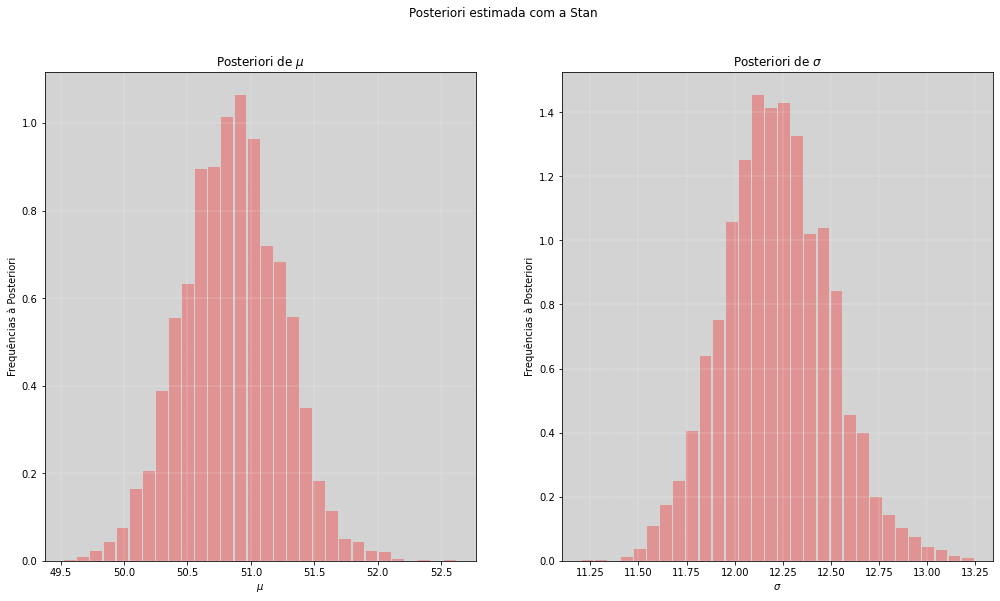

In [14]:
# Recuperando os par√¢metros
mu_modelo_1 = fit['mu']  # Amostras da posteriori do ùúá
sigma_modelo_1 = fit['sigma']  # Amostras da posteriori do ùúé

print('='*70)
print('  mu m√©dio: ', round(mu_modelo_1.mean(), 2), ' \t mu original: ', mu_nao_observavel)
print('  sigma m√©dio: ', round(sigma_modelo_1.mean(), 2), ' \t sigma original: ', sigma_nao_observavel)
print('='*70)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada com a Stan")

ax1.hist(mu_modelo_1.flatten(), bins=30, rwidth=0.9, density=True, color='red', alpha=0.3)
ax1.grid(color='white', ls='--', linewidth=0.3)
ax1.set_title('Posteriori de $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Frequ√™ncias √† Posteriori')

ax2.hist(sigma_modelo_1.flatten(), bins=30, rwidth=0.9, density=True, color='red', alpha=0.3)
ax2.grid(color='white', ls='--', linewidth=0.3)
ax2.set_title('Posteriori de $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Frequ√™ncias √† Posteriori')

plt.show()

## Estimando a altura usando a Stan

De volta ao exemplo anterior, vamos estimar a altura $h$ usando um modelo escrito em Stan.

In [15]:
modelo_altura = """
    data {
        int N;
        real altura[N];
    }

    parameters {
        real mu;
        real<lower=0, upper=50> sigma;  // Priori para sigma ~ Uniform(0, 50)
    }

    model {
        mu ~ normal(178, 20);   // Priori para mu
        // sigma ~ uniform(1, 50);  // Priori para sigma

        altura ~ normal(mu, sigma);
    }
"""

altura = df.height.values

# Como recomenda a documenta√ß√£o https://mc-stan.org/docs/2_22/stan-users-guide/standardizing-predictors-and-outputs.html
# Iremos rescalonar o vetor de altura antes de mandar para a Stan
altura_media = altura.mean()
altura_std = altura.std()
altura_resc = (altura - altura_media) / altura_std

dados = {'N': len(altura), 'altura': altura}  # Iremos usar a altura n√£o normalizada para efeito de simplifica√ß√£o.

posteriori_model = stan.build(modelo_altura, data=dados)
fit_altura = posteriori_model.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_yde37gmx/model_koph5zch.stan', line 13, column 25: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_yde37gmx/model_koph5zch.stan', line 13, column 20: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 8e-06 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.5e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 1.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.


  Adjust your expectations accordingly!


Comparativo com a amostra
  mu amostrado:  138.26
  sigma amostrado:  27.6
  mu m√©dio:  138.41
  sigma m√©dio:  27.66


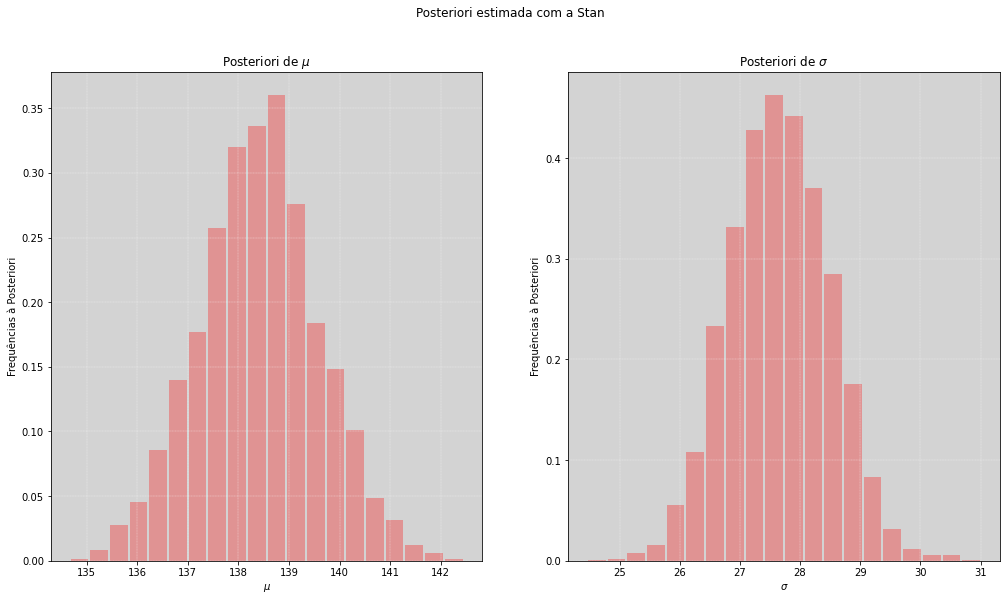

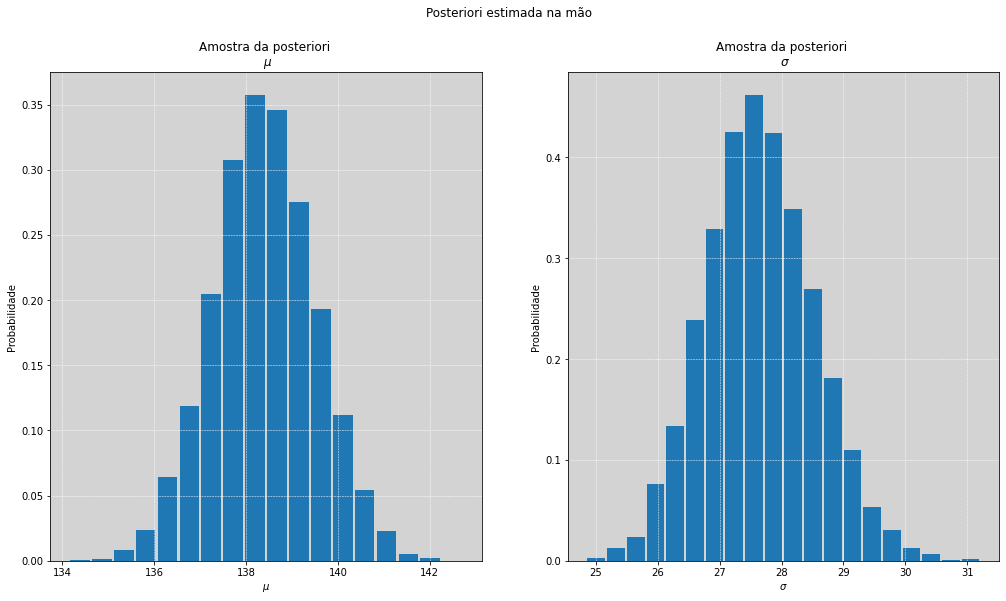

In [16]:
# =============================
#  Modelo calculado na Stan
# =============================

# Recuperando os par√¢metros
mu_altura = fit_altura['mu']
sigma_altura = fit_altura['sigma']
print('Comparativo com a amostra')
print('='*30)
print('  mu amostrado: ', round(df.height.mean(), 2))
print('  sigma amostrado: ', round(df.height.std(), 2))
print('='*30)
print('  mu m√©dio: ', round(mu_altura.mean(), 2))
print('  sigma m√©dio: ', round(sigma_altura.mean(), 2))
print('='*30)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada com a Stan")

ax1.hist(mu_altura.flatten(), bins=20, rwidth=0.9, density=True, color='red', alpha=0.3)
ax1.grid(color='white', ls='--', linewidth=0.3)
ax1.set_title('Posteriori de $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Frequ√™ncias √† Posteriori')

ax2.hist(sigma_altura.flatten(), bins=20, rwidth=0.9, density=True, color='red', alpha=0.3)
ax2.grid(color='white', ls='--', linewidth=0.3)
ax2.set_title('Posteriori de $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Frequ√™ncias √† Posteriori')

plt.show()

# =============================
#  Modelo calculado na m√£o
# =============================
# Amostrando mu e sigma a partir da posteriori calculada na m√£o (exemplo constru√≠do acima)

amostras_posteriori_index = np.random.choice(np.arange(grid*grid), size=10000, replace=True, p=posteriori)

mu_amostrado = mu[amostras_posteriori_index]
sigma_amostrado = sigma[amostras_posteriori_index]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada na m√£o")

ax1.hist(mu_amostrado, bins=18, rwidth=0.9, density=True)
ax1.set_title('Amostra da posteriori \n $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', ls='--', linewidth=0.5)

ax2.hist(sigma_amostrado, bins=20, rwidth=0.9, density=True)
ax2.set_title('Amostra da posteriori \n $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', ls='--', linewidth=0.5)

plt.show()

## Adicionando uma vari√°vel Preditora

Agora, iremos refazer a estimativa da altura, mas utulizaremos `mais uma vari√°vel` para nos ajudar explicar melhor a altura, assim teremos mais informa√ß√µes, usaremos o `peso` (*weight*) que nos ajudar√° a descrever a altura (*height*)?

*Obs: Iremos utilizar apenas pessoas que tenham acima de 18 anos de idade para todos os estudo seguintes, apenas simplesmente como efeito did√°tico.*

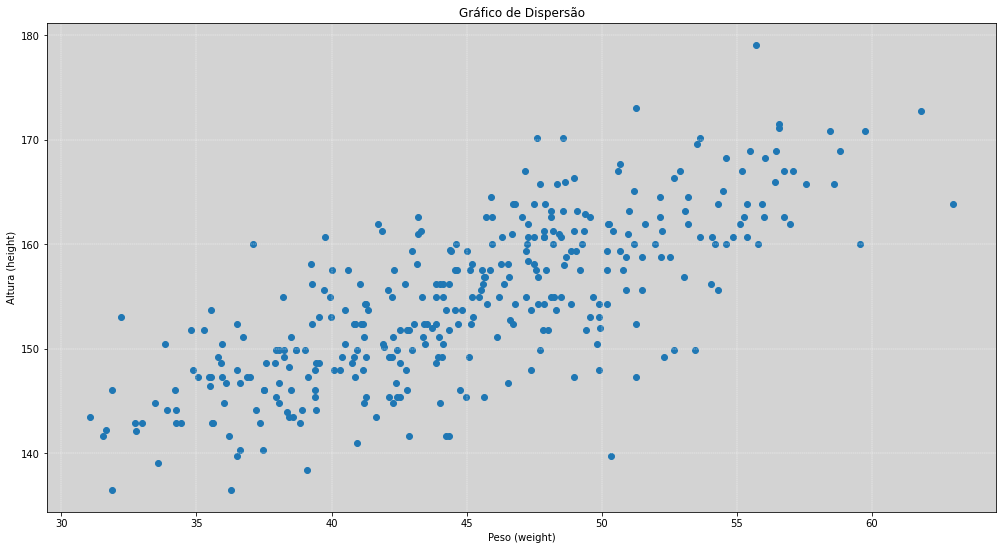

In [17]:
# Gr√°fico de dispers√£o - peso ajudar a identificar qual a altura.
plt.figure(figsize=(17, 9))
plt.scatter(df.loc[df.age >= 18, 'weight'],  # Filtro para todos as pessoas que tem acima de 18 anos
            df.loc[df.age >= 18, 'height'])  # Filtro para todos as pessoas que tem acima de 18 anos

plt.title('Gr√°fico de Dispers√£o')
plt.xlabel('Peso (weight)')
plt.ylabel('Altura (height)')
plt.grid(color='white', ls='--', linewidth=0.4)

plt.show()

Usando um modelo linear de m√©dia, $\mu$:

$$ h_i \sim Normal(\mu_i, \sigma), \mbox{ [Verossimilha√ßas] }$$


$$ mu_i = \alpha + \beta(x_i + \bar{x}), \mbox{ [Modelo Linear] } $$


$$  \alpha \sim Normal(178, 20), \mbox{ [Priori de }\alpha \mbox{]} $$


$$  \beta \sim Normal(0, 10), \mbox{ [Priori de }\beta \mbox{]} $$


$$  \sigma \sim Uniform(0, 50), \mbox{ [Priori de }\sigma \mbox{]} $$


Vamos agora construir uma reta, `um modelo linear`. At√© agora n√≥s fizemos infer√™ncias de $1$ ou $2$ par√¢metros e que podem ser aproximadas como uma gaussiana.


Mas o que significa fazer um modelo linear, ou utilizar uma reta no modelo? Isso significa que podemos adicionar uma nova vari√°vel que ir√° nos ajudar a melhorar nosso entendimento da vari√°vel `altura`. Essa nova vari√°vel ter√° a fun√ß√£o, dentro do nosso modelo, de predizer, ou seja, dizer antecipadamente, antever, adivinhar, prever qual √© a da altura do indiv√≠duo, probabilisticamente. Chamamos todas essas vari√°veis que podem nos ajudar de `vari√°veis preditoras`.


A principal ideia em adicionar uma vari√°vel preditora, assim como outras vari√°veis do nosso conjunto de dados, √© que quando aprendemos, podemos fazer melhores previs√µes sobre o resultado de interesse que, nesse caso, √© a `altura`.


Para ficar mais claro, quando pretendemos saber a altura de uma pessoa sem termos nenhuma informa√ß√£o adicional, o melhor que podemos fazer √© usar a estimativa da altura da popula√ß√£o toda para estimar a altura desse indiv√≠duo. √â o m√°ximo que podemos fazer com as informa√ß√µes que temos dispon√≠veis.

Mas se esse mesmo indiv√≠duo, assim como todos da amostra, nos informar uma caracter√≠stica a mais para n√≥s estimarmos sua altura? Nesse exemplo, o peso √© uma dessas informa√ß√µes adicionais, `vari√°vel preditora`, assim teremos mais conhecimento para poder estimar a sua *altura*. 


### Explicando o modelo acima:

Agora temos que $h_i$ tamb√©m cont√≠nua distribu√≠da como uma `Gaussiana` como no exemplo anterior, por√©m agora a m√©dia $\mu$ n√£o √© apenas distribu√≠da normalmente com a m√©dia fixa em 178, depender√° de cada indiv√≠duo $i$, assim: 

$$ \mu_i = \alpha + \beta(x_i + \bar{x}) $$

$x_i$ representa o peso de uma pessoa em particular.

Em instante iremos entender melhor o que significa todos os termos de $\mu$. O $\alpha$ e o $\sigma$ continuam com as mesmas prioris do exemplo anterior, e agora temos uma nova distribui√ß√£o √† priori para $\beta$, que √© o respons√°vel por descrever a rela√ß√£o entre `altura` e o `peso`.

Observando mais profundamente a estrutura que criamos nosso novo modelo:

$$ \mu_i = \alpha + \beta(x_i + \bar{x}) $$


- $\mu_i$ = √© a m√©dia da linha i



- $\alpha$ = √© a altura m√©dia da quando $x_i = \bar{x}$, conhecida como o `intercepto`. (*Lindo!!!*)



- $\beta$ = taxa de mudan√ßa para $\mu$ cada unidade de mudan√ßa de $x_i$, conhecido como a `inclina√ß√£o`.

Se por acaso o $\beta$ for zero, estamos novamente no modelo anterior. Ou seja, estamos dizendo que n√£o h√° rela√ß√£o  transmitida para o $\mu$ a partir do peso. Do contr√°rio, cada n√∫mero que o $x_i$ sobe, subimos $\beta$ o $\mu$.

Escrever nossos modelos lineares dessa forma nos permite entender e definir melhor os par√¢metros e nossa prioris, mas nem todos os modelos devem ser escritos dessa forma e nesse caso deveremos ter uma boa justificativa.

## Distribui√ß√£o Priori Preditiva

Quais s√£o as prioris desse modelo e o que essas prioris significam?

Como, no exemplo anterior, vamos simular para entender e compreender as implica√ß√µes do modelo.


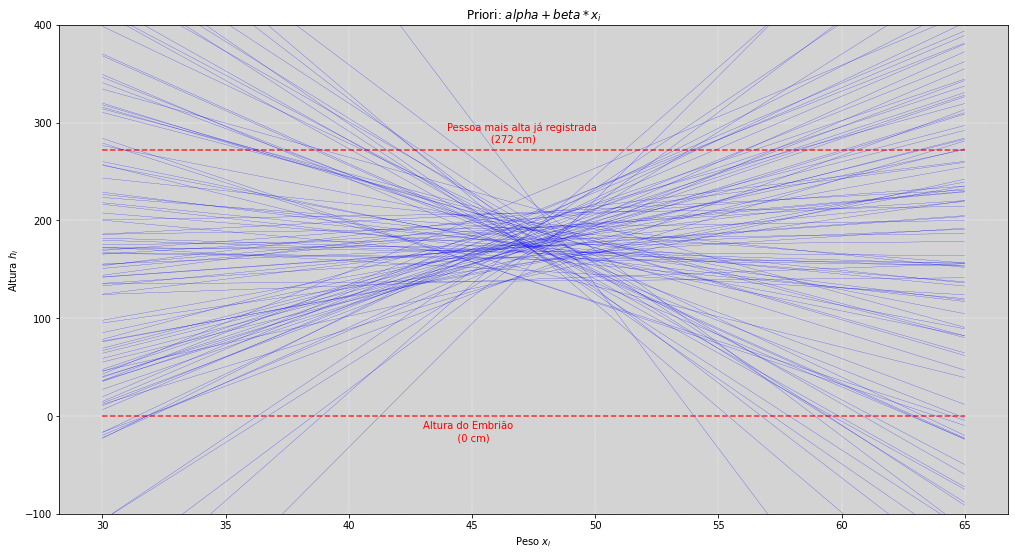

In [18]:
# ===========================
#     Simulando a Priori
# ===========================

N = 100  # A quantidade de vezes que iremos simular os dados da priori

alpha_priori = np.random.normal(178, 20, N)
beta_priori = np.random.normal(0, 10, N)

plt.figure(figsize=(17, 9))

for i in range(N):
    plt.plot(np.linspace(30, 65, N), 
             alpha_priori[i] + beta_priori[i] * (np.linspace(-17.5, 17.5, N)), # (x_i - x_bar)
             color='blue', linewidth=0.2)

plt.ylim(-100, 400)
plt.hlines(0, 30, 65, ls='--', color='red', alpha=0.8)  # Linha inferior vermelha: Altura √≥vulo fertilizado (0cm)  
plt.hlines(272, 30, 65, ls='--', color='red', alpha=0.8)  # Linha superior vermelha: Pessoa mais alta do mundo (272 cm)
  
plt.annotate('Pessoa mais alta j√° registrada \n              (272 cm)', (44, 280), color='red')
plt.annotate('Altura do Embri√£o \n           (0 cm)', (43, -25), color='red')
plt.title('Priori: $alpha + beta * x_i$')
plt.ylabel('Altura $h_i$')
plt.xlabel('Peso $x_i$')

plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

O resultado das simula√ß√µes da distribui√ß√£o √† priori do $\alpha$ e o $\beta$, geram as curvas acima, de acordo o modelo: 

$$ altura = \alpha + \beta \times peso $$ 

com podemos ver no gr√°fico, muitas linhas tem valores superiores √† altura de $272 cm$. Tamb√©m podemos ver que existem linhas que indicam alturas menores que zero, `o que naturalmente deveria estar errado`. Ambos comportamentos s√£o prioritariamente resultantes dos valores gerados pela distribui√ß√£o dos $\beta$'s, a inclina√ß√£o da reta. 

```{note}
Essas retas s√£o as nossas cren√ßas √† priori.
```

Agora que temos um pouco mais de intimidade com o comportamento das nossas prioris, podemos concluir que devemos diminuir nosso entusiasmo com rela√ß√£o ao $\beta$, pois essa `√© uma priori muito ruim`. Haver√° momentos, em situa√ß√µes reais, que ser√° necess√°rio verificar a compatibilidade com o mundo real. Fa√ßa altera√ß√µes nas prioris para verificar a mudan√ßa no efeito.

### Distribui√ß√£o Preditiva da Priori

N√≥s agora sabemos algo sobre as prioris, temos um conhecimento cient√≠fico sobre a nossa distribui√ß√£o dos $\beta$'s, sabemos que ele √© positivo, assim, ent√£o, vamos transforma-lo em positivo? 


*Mas como?*


Para fazer isso, usaremos a distribui√ß√£o `log-Normal`. Essa distribui√ß√£o pode ser um pouco menos conhecida, por√©m √© muito √∫til para situa√ß√µes desse tipo. Essa distribui√ß√£o, log-Normal, constru√≠da partir da exponencia√ß√£o dos valores da distribui√ß√£o Normal.

 $$lognormal(0, 1) = exp\{ Normal(0, 1)\}$$ 

Na teoria das probabilidades, uma distribui√ß√£o log-normal (ou lognormal) √© uma distribui√ß√£o de probabilidade cont√≠nua de uma vari√°vel aleat√≥ria cujo logaritmo √© normalmente distribu√≠do.

Assim, se a vari√°vel aleat√≥ria $X$ √© log-normalmente distribu√≠da, ent√£o $Y = log(X)$ tem uma distribui√ß√£o normal. *(Ref. Wikipedia)*

Refer√™ncias:
- [Numpy - Log-Normal](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)

- [Scipy - Log-Normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html)

- [Wikipedia - Log-Normal](https://en.wikipedia.org/wiki/Log-normal_distribution)


-----

Um caminho para se entender melhor o que √© uma $lognormal$ √© o seguinte:

Qual √© a distribui√ß√£o de $X$, na qual, ao aplicarmos o log, $log(X)$, ela se tornar√° $Normal$? Naturalmente temos que:

de acordo com a express√£o abaixo: 

$$ log(exp(a)) = a , \forall a \in R$$

se a distribui√ß√£o de $X$ for:

$$ X \sim exp\{Normal\} $$

ent√£o a opera√ß√£o abaixo √© v√°lida,

$$  log(exp\{Normal\}) = Normal $$

logo,

$$ log(X) = Normal $$

ent√£o:

$$ X \sim lognormal $$

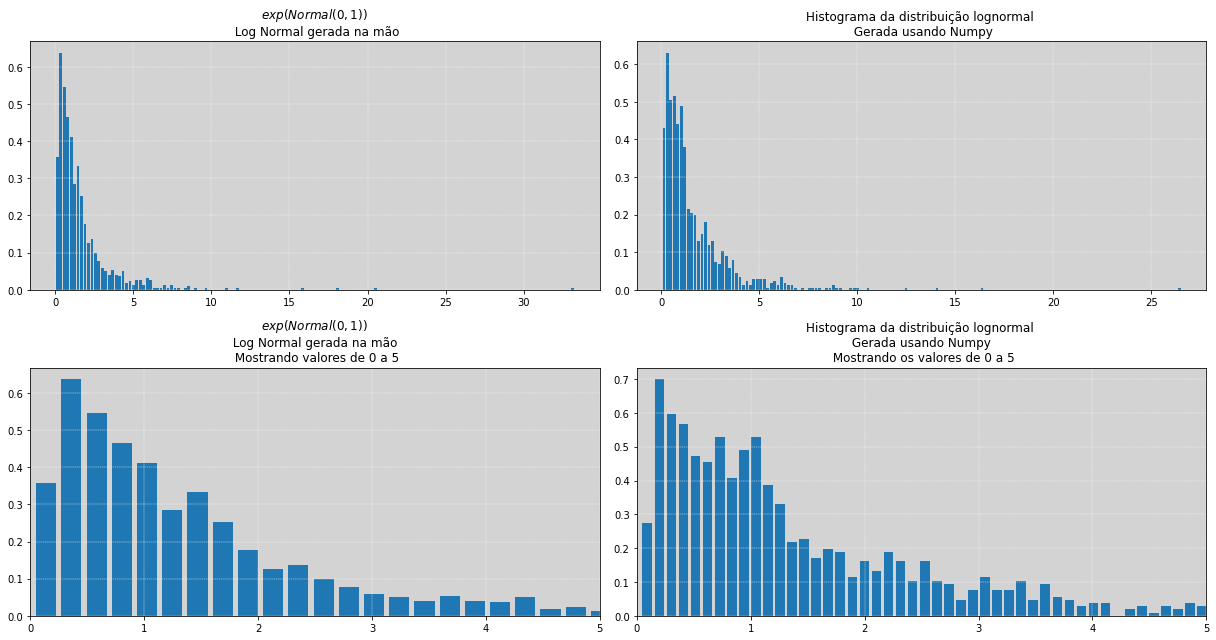

In [19]:
# =====================================
#     Estudos sobre as Log-Normais 
# =====================================
# Iremos plotar, a partir de uma 
# distribui√ß√£o normal, uma lognormal 
# e compara-la com amostragem da 
# lognormal implementada no Numpy!
# =====================================

d_normal = np.random.normal(0, 1, 1000)
d_lognormal = np.random.lognormal(0, 1, 1000)

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(17, 9))

ax1.hist(np.exp(d_normal), bins=150, density=True, rwidth=0.8)
ax1.set_title('$exp( Normal(0,1) )$ \n Log Normal gerada na m√£o')
ax1.grid(color='white', ls='--', linewidth=0.4)

ax2.hist(d_lognormal, bins=150, density=True, rwidth=0.8)
ax2.set_title('Histograma da distribui√ß√£o lognormal \n Gerada usando Numpy')
ax2.grid(color='white', ls='--', linewidth=0.4)

ax3.hist(np.exp(d_normal), bins=150, density=True, rwidth=0.8)
ax3.set_xlim(0, 5)
ax3.set_title('$exp( Normal(0,1) )$ \n Log Normal gerada na m√£o \n Mostrando valores de 0 a 5')
ax3.grid(color='white', ls='--', linewidth=0.4)

ax4.hist(d_lognormal, bins=250, density=True, rwidth=0.8)
ax4.set_xlim(0, 5)
ax4.set_title('Histograma da distribui√ß√£o lognormal \n Gerada usando Numpy \n Mostrando os valores de 0 a 5')
ax4.grid(color='white', ls='--', linewidth=0.4)

plt.tight_layout()  # Ajustar as dist√¢ncias entre os gr√°ficos
plt.show()

-----

Com a lognormal explicada, iremos trocar a distribui√ß√£o da a priori de: 

$$\beta \sim Normal(0, 10)$$

para uma priori que √© distribu√≠da conforme uma *lognormal*: 

$$\beta \sim lognormal(0, 1)$$

Assim, como antes, vamos `simular para entender o novo comportamento da nossa priori`. 

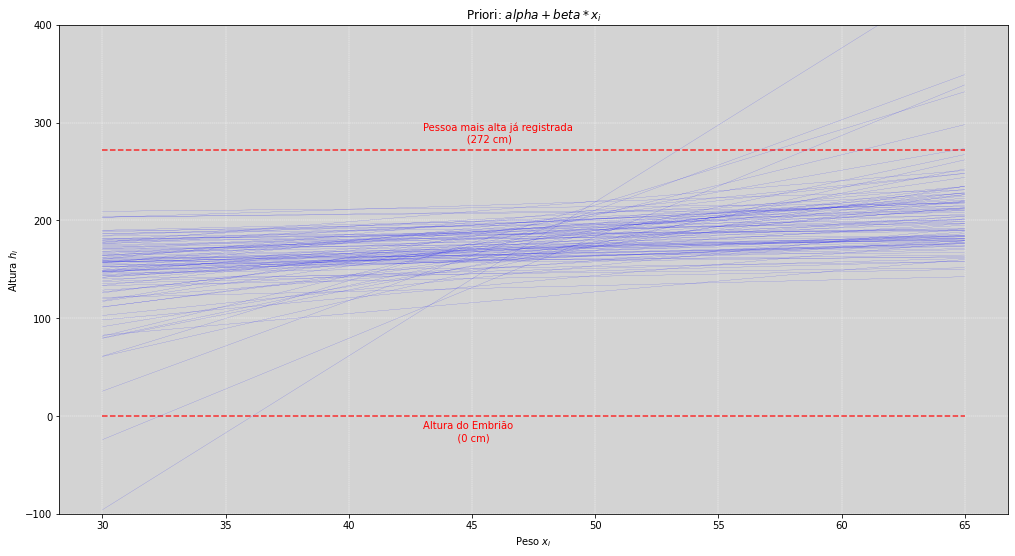

In [20]:
# ==========================================
#     Simulando a priori com log-normal
# ==========================================

N = 100  # A quantidade de vezes que iremos simular os dados da priori

alpha_priori = np.random.normal(178, 20, N)
beta_priori = np.random.lognormal(0, 1, N)  # Priori lognormal(0, 1)

plt.figure(figsize=(17, 9))

for i in range(N):
    plt.plot(np.linspace(30, 65, N), alpha_priori[i] + beta_priori[i] * (np.linspace(-17.5, 17.5, N)), # (x_i - x_bar)
             color='blue', linewidth=0.1)

plt.ylim(-100, 400)
plt.hlines(0, 30, 65, ls='--', color='red', alpha=0.8)  # Linha inferior vermelha: Altura √≥vulo fertilizado (0cm)  
plt.hlines(272, 30, 65, ls='--', color='red', alpha=0.8)  # Linha superior vermelha: Pessoa mais alta do mundo (272 cm)
  
plt.annotate('Pessoa mais alta j√° registrada \n              (272 cm)', (43, 280), color='red')
plt.annotate('Altura do Embri√£o \n           (0 cm)', (43, -25), color='red')
plt.title('Priori: $alpha + beta * x_i$')
plt.ylabel('Altura $h_i$')
plt.xlabel('Peso $x_i$')

plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

N√≥s ainda temos muita dispers√£o e tamb√©m temos ainda algumas poucas linhas que ultrapassam a maior altura j√° registrada (de $272 cm$). Isso acontece porque n√£o limitamos a nossa margem superior pela distribui√ß√£o de $\beta$. Mas essa nossa nova abordagem parece ser uma priori bem mais condizente com o que podemos imaginar.

#### Aproxima√ß√£o da posteriori

Vamos fazer a aproxima√ß√£o da posteriori usando a *Stan* e verificar os resultados.

In [21]:
# =================================================================
#   Aproximando a posteriori da altura usando o peso da pessoa
# =================================================================

modelo_altura_2 = """
    data {
        int N;
        real x_barra;
        real altura[N];
        real peso[N];
    }

    parameters {
        real alpha;
        real<lower=0> beta;
        real<lower=0, upper=50> sigma;
    }

    model {
        alpha ~ normal(178, 20);
        beta ~ lognormal(0, 1);
        // sigma ~ uniform(0, 50);

        for (i in 1:N){
            altura[i] ~ normal(alpha +  beta * (peso[i] - x_barra), sigma);
        }
}
"""

# Nossa amostra √© apenas para pessoas acima de 18 anos
df_maioridade = df.loc[df.age >= 18, ['weight', 'height']]

# Definindo as vari√°veis
N = len(df_maioridade)
x_barra = df_maioridade.weight.mean()
altura = df_maioridade.height.values
peso = df_maioridade.weight.values

# Construindo o dicion√°rio
meus_dados_2 = {'N': N, 
                'x_barra': x_barra, 
                'altura': altura, 
                'peso': peso}

# Rodando o modelo
posteriori_model_2 = stan.build(modelo_altura_2, data=meus_dados_2)
fit_altura_2 = posteriori_model_2.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.


Messages from stanc:


Warning in '/tmp/httpstan_6tab0ly4/model_shu6wb5c.stan', line 16, column 28: Argument 20 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_6tab0ly4/model_shu6wb5c.stan', line 16, column 23: Argument 178 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).


Sampling:   0%


Sampling:  25% (2000/8000)


Sampling:  50% (4000/8000)


Sampling:  75% (6000/8000)


Sampling: 100% (8000/8000)


Sampling: 100% (8000/8000), done.


Messages received during sampling:


  Gradient evaluation took 0.000167 seconds


  1000 transitions using 10 leapfrog steps per transition would take 1.67 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 8.6e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.86 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 8e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.8 seconds.


  Adjust your expectations accordingly!


  Gradient evaluation took 7.4e-05 seconds


  1000 transitions using 10 leapfrog steps per transition would take 0.74 seconds.


  Adjust your expectations accordingly!


Resumo das posterioris:
Media alpha:  154.6  - Desvio Padr√£o alpha:  0.279
M√©dia beta:   0.904  - Desvio Padr√£o beta:   0.043
M√©dia sigma:  5.109  - Desvio Padr√£o sigma:  0.198


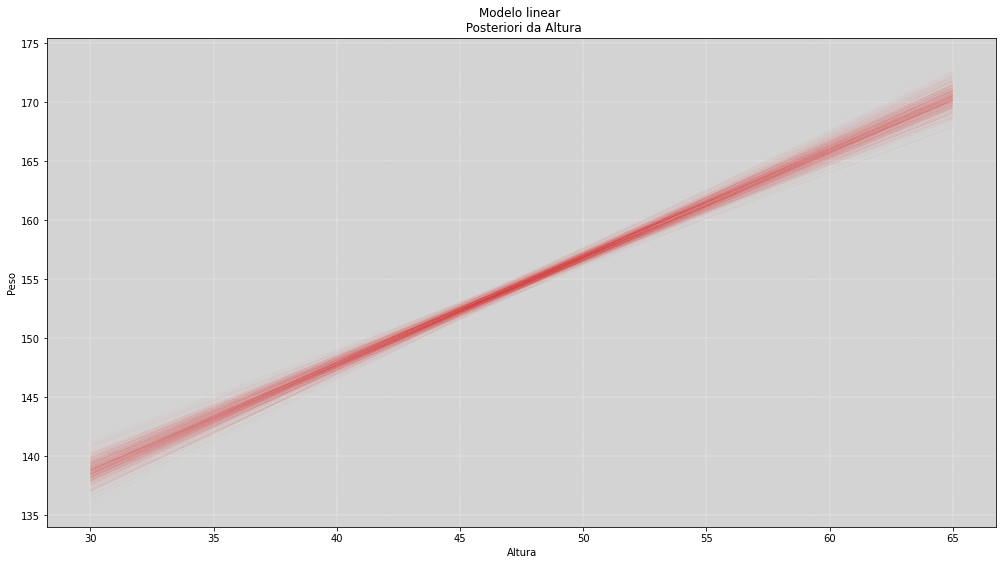

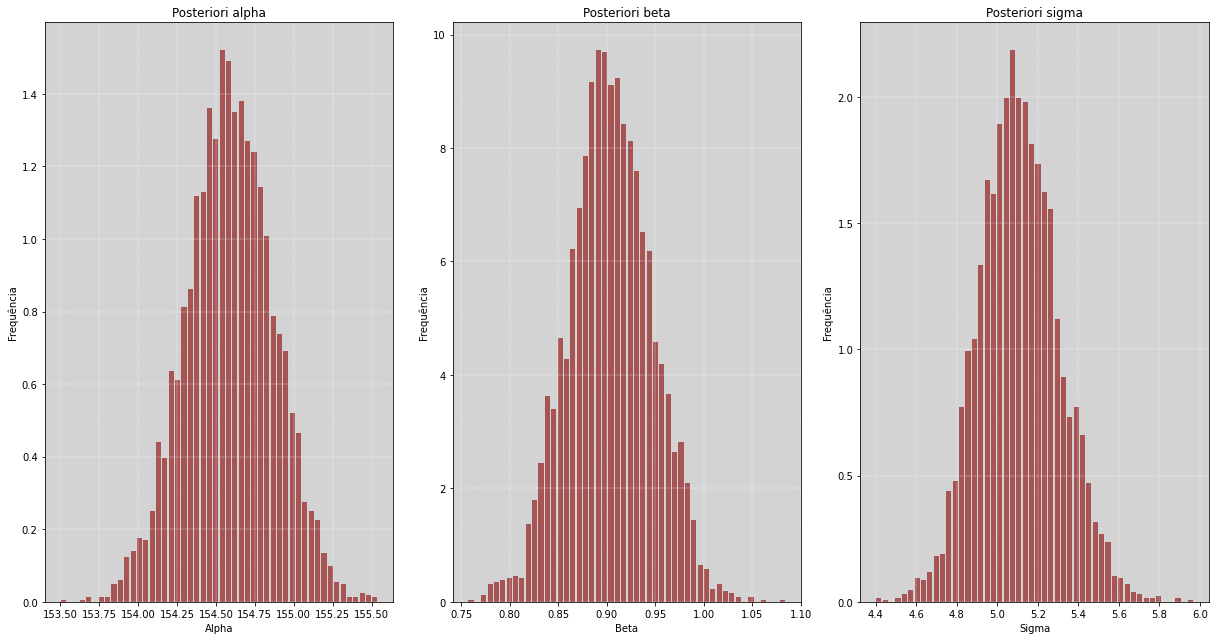

In [22]:
# =============================
#  Modelo calculado na Stan
# =============================

# Recuperando os par√¢metros
alpha_posteriori = fit_altura_2['alpha'].flatten()
beta_posteriori = fit_altura_2['beta'].flatten()
print('Resumo das posterioris:')
print('='*60)
print('Media alpha: ', round(fit_altura_2['alpha'].mean(), 1), 
     ' - Desvio Padr√£o alpha: ', round(fit_altura_2['alpha'].std(), 3))
print('M√©dia beta:  ', round(fit_altura_2['beta'].mean(), 3),
      ' - Desvio Padr√£o beta:  ', round(fit_altura_2['beta'].std(), 3))
print('M√©dia sigma: ', round(fit_altura_2['sigma'].mean(), 3), 
      ' - Desvio Padr√£o sigma: ', round(fit_altura_2['sigma'].std(), 3))


N = len(alpha_posteriori)  # Plotar todas as curvas estimadas
N = 500  # Plotar as 100 primeiras curvas

plt.figure(figsize=(17, 9))

plt.title('Modelo linear \n Posteriori da Altura')
plt.xlabel('Altura')
plt.ylabel('Peso')

for i in range(N):
    plt.plot(np.linspace(30, 65, N), alpha_posteriori[i] + beta_posteriori[i] * (np.linspace(-17.5, 17.5, N)), 
             color='red', linewidth=0.01)
plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

# ==========================================
#    Plot todas as vari√°veis  estimadas
# ==========================================
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 9))

ax1.hist(fit_altura_2['alpha'].flatten(), bins=50, density=True, rwidth=0.8, color='darkred', alpha=0.6)
ax1.set_title('Posteriori alpha')
ax1.grid(color='white', ls='--', linewidth=0.4)
ax1.set_ylabel('Frequ√™ncia')
ax1.set_xlabel('Alpha')

ax2.hist(fit_altura_2['beta'].flatten(), bins=50, density=True, rwidth=0.8, color='darkred', alpha=0.6)
ax2.set_title('Posteriori beta')
ax2.grid(color='white', ls='--', linewidth=0.4)
ax2.set_ylabel('Frequ√™ncia')
ax2.set_xlabel('Beta')

ax3.hist(fit_altura_2['sigma'].flatten(), bins=50, density=True, rwidth=0.8, color='darkred', alpha=0.6)
ax3.set_title('Posteriori sigma')
ax3.grid(color='white', ls='--', linewidth=0.4)
ax3.set_ylabel('Frequ√™ncia')
ax3.set_xlabel('Sigma')

plt.tight_layout()  # Ajustar as dist√¢ncias entre os gr√°ficos
plt.show()

# Resumo

At√© aqui vimos a constru√ß√£o de um modelo linear simples usando a Stan, vimos tamb√©m como pensar e como construir uma priori, vimos como gerar as amostras da posteriori e analisar seus resultados.

O modelo linear √© o modelo muito simples e √© empregado em *muitas* an√°lises no dia a dia. 

Na mesma linha de racioc√≠nio que usamos para pensar e construir esse modelo de regress√£o linear, n√≥s tamb√©m iremos utiliz√°-la na pr√≥xima parte desse material. Iremos adicionar mais ferramentas dentro dessa estrutura e, com isso, aumentaremos um pouco mais a profundidade que nossas an√°lises podem alcan√ßar.